<a href="https://colab.research.google.com/github/aliehhz/NLP-Learnings/blob/main/Project02_WordEmbedding_RezaShokrzad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📰 News Article Similarity Analysis using NLP 🧠📊

## 🎯 Objective
This notebook explores text similarity among news articles using NLP techniques. We will:

✅ Convert text into numerical vectors using pre-trained **GloVe embeddings**.  
✅ Reduce dimensionality for visualization using **PCA**.  
✅ Apply **K-Means clustering** to group similar news articles.  

---

## 🔍 Why GloVe?
GloVe (**Global Vectors for Word Representation**) provides **dense vector embeddings** trained on a large corpus, allowing us to capture the **semantic meaning** of words efficiently. 🏆✨  

Using GloVe, we can **transform text into meaningful numerical representations** for further processing and clustering. 🚀📖


In [ ]:
# 📥 Import necessary libraries
# ⬇️ Download stopwords for text cleaning

import pandas as pd
import numpy as np

import nltk
import spacy

nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("wordnet")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 📊 Data Overview
The dataset consists of news articles with the following columns:

📰 **title**: The headline of the news article.  
📄 **content**: The full text of the article.  

🎯 Our goal is to **analyze the similarity between articles** and **group them into clusters** for better understanding. 🔍🤖  


In [ ]:

# download the dataset
!wget https://raw.githubusercontent.com/mage-ai/datasets/refs/heads/master/news_articles.csv


--2025-04-02 00:52:45--  https://raw.githubusercontent.com/mage-ai/datasets/refs/heads/master/news_articles.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18236066 (17M) [text/plain]
Saving to: ‘news_articles.csv.1’

news_articles.csv.1 100%[===================>]  17.39M  --.-KB/s    in 0.1s    

2025-04-02 00:52:45 (124 MB/s) - ‘news_articles.csv.1’ saved [18236066/18236066]



In [ ]:

# Load dataset
df_origin = pd.read_csv("news_articles.csv")
df = df_origin.copy()

# Display basic dataset information
print("Shape of Dataset:", df.shape, "\n")
df.head()

Shape of Dataset: (55335, 6) 



,topic,headline,author,link,description,published date
0,entertainment,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
1,entertainment,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
2,entertainment,Morgan Freeman 'Devastated' That Sexual Harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018-05-26
3,entertainment,What To Watch On Amazon Prime That’s New This ...,Todd Van Luling,https://www.huffingtonpost.com/entry/amazon-pr...,There's a great mini-series joining this week.,2018-05-26
4,entertainment,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,Andy McDonald,https://www.huffingtonpost.com/entry/mike-myer...,"Myer's kids may be pushing for a new ""Powers"" ...",2018-05-26


## 🛠️ Text Preprocessing
✅ **Lowercasing** to standardize words. 🔡  
✅ **Removing special characters and punctuation** to clean the text. ✂️🧹  


In [ ]:
# Handling missing values
df.isna().sum()

,0
topic,0
headline,1
author,9454
link,0
description,5705
published date,0


In [ ]:
df.dropna(subset=['headline'], inplace=True)
df['author'].fillna('No author name available.', inplace=True)
df['description'].fillna('No description available.', inplace=True)
df.isna().sum()

<ipython-input-21-9c0c02f75079>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['author'].fillna('No author name available.', inplace=True)
<ipython-input-21-9c0c02f75079>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,0
topic,0
headline,0
author,0
link,0
description,0
published date,0


In [ ]:
# Handling missing values
# Lowercasing
# Remove non-word characters

stop_words = set(stopwords.words("english"))

# Cleaning function
def cleaning(text):
    if isinstance(text, str):
        lower_text = text.lower()
        words = word_tokenize(lower_text)
        words = [word for word in words if word.isalnum() and word not in stop_words]
        return " ".join(words)
    return text

#apply the above function on the dataframe
cols = ["topic","headline", "author", "description"]
for col in cols:
    df[col] = df[col].apply(cleaning)


df.head()


,topic,headline,author,link,description,published date
0,entertainment,smith joins diplo nicky jam 2018 world cup off...,andy mcdonald,https://www.huffingtonpost.com/entry/will-smit...,course song,2018-05-26
1,entertainment,hugh grant marries first time age 57,ron dicker,https://www.huffingtonpost.com/entry/hugh-gran...,actor longtime girlfriend anna eberstein tied ...,2018-05-26
2,entertainment,morgan freeman sexual harassment claims could ...,ron dicker,https://www.huffingtonpost.com/entry/morgan-fr...,right equate horrific incidents sexual assault...,2018-05-26
3,entertainment,watch amazon prime new week,todd van luling,https://www.huffingtonpost.com/entry/amazon-pr...,great joining week,2018-05-26
4,entertainment,mike myers reveals fourth austin powers film,andy mcdonald,https://www.huffingtonpost.com/entry/mike-myer...,myer kids may pushing new powers film anyone,2018-05-26


## 🏆 GloVe-Based Embeddings  
Each article is converted into a **100-dimensional numerical vector** using **GloVe embeddings**. 🔢✨  

🔹 If a word is **found** in GloVe, its corresponding **vector** is used. ✅  
🔹 If **no words** in an article match the GloVe vocabulary, a **zero vector** is assigned. ⚠️0️⃣  

Using these vectors, we can numerically represent text for further **analysis and clustering**. 📊🔍🚀  


In [ ]:
import urllib.request
import os
import zipfile

url = 'https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip'
output = os.path.join(os.getcwd(), 'glove.6B.zip')  # Save to the current working directory

urllib.request.urlretrieve(url, output)

# Unzip the file
with zipfile.ZipFile('./glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('./glove')


In [ ]:

# Load GloVe Embeddings
glove_path = "glove/glove.6B.100d.txt"  # Change if using a different version


In [ ]:

# Convert articles to vectors
import numpy as np

# Load GloVe embeddings into a dictionary
def load_glove_embeddings(filepath):
    glove_dict = {}
    with open(filepath, 'r', encoding="utf-8") as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            glove_dict[word] = vector
    return glove_dict

# Function to convert a sentence to a vector
def sentence_to_glove_vector(sentence, glove_dict, vector_dim=100):
    words = sentence.split()
    vectors = [glove_dict[word] for word in words if word in glove_dict]
    if len(vectors) == 0:
        return np.zeros(vector_dim)  # Return a zero vector if no words are found
    return np.mean(vectors, axis=0)  # Averaging word vectors

# Load GloVe
glove_dict = load_glove_embeddings(glove_path)




In [ ]:
# Convert 'headline' and 'description' to vectors
df["description_vector"] = df["description"].apply(lambda x: sentence_to_glove_vector(str(x), glove_dict))
print(df["description_vector"][0].shape)
print(df["description_vector"])

(100,)
0        [-0.142866, 0.002452001, 0.57652, 0.047114998,...
1        [0.06428084, -0.20556878, -0.010586997, -0.065...
2        [0.054433, -0.011417464, 0.19488525, -0.232795...
3        [0.062111337, 0.17907566, 0.30704334, -0.17383...
4        [0.17911863, -8.2377344e-05, 0.278032, -0.2348...
                               ...                        
55330    [-0.11818216, 0.26371136, 0.14163527, -0.18518...
55331    [-0.025036434, 0.5720159, 0.24675068, -0.08974...
55332    [-0.06496139, 0.20046556, 0.07215589, -0.03634...
55333    [-0.028786499, 0.2403072, 0.16833198, -0.07968...
55334    [0.16990668, -0.21841101, 0.3186522, -0.092070...
Name: description_vector, Length: 55334, dtype: object


## ℹ️ Understanding PCA for Dimensionality Reduction  

### Why PCA? 🤔  
When working with **high-dimensional data**, it’s difficult to visualize and analyze patterns. **Principal Component Analysis (PCA)** helps by reducing the number of dimensions while **preserving important information**.  

### How Does It Work? ⚙️  
PCA transforms our **high-dimensional word embeddings** (100 dimensions) into **2 principal components** that capture most of the variance in the data. This allows us to **visualize articles in a 2D space**, making clustering more interpretable.  

🎯 **Goal:** Reduce dimensionality while retaining the most important information for better visualization and clustering.  
📊 **Next Step:** We’ll plot the articles in a 2D space to see if meaningful patterns emerge! 🚀  


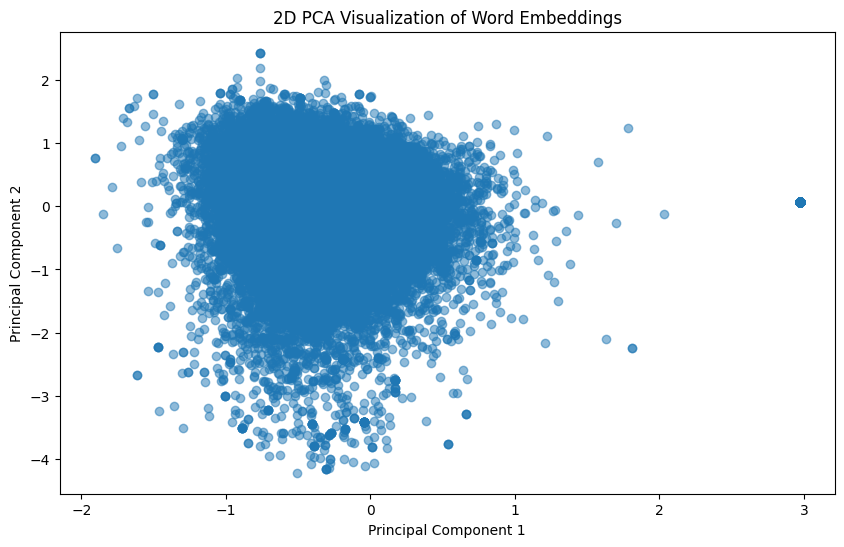

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


description_vectors = np.vstack(df["description_vector"].values)


# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(description_vectors)


# Store PCA results in DataFrame
df["pca_x"] = X_pca[:, 0]
df["pca_y"] = X_pca[:, 1]


# display the result in 2d diagram
plt.figure(figsize=(10, 6))
plt.scatter(df['pca_x'], df['pca_y'], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization of Word Embeddings")
plt.show()

## ℹ️ Understanding K-Means Clustering  

### Why Clustering? 🧐  
Once we have numerical representations of articles, we want to **group similar news articles together** based on their content. **K-Means clustering** is a powerful unsupervised learning algorithm that does exactly this!  

### How Does K-Means Work? ⚙️  
1️⃣ Choose the number of clusters (**k**)  
2️⃣ Assign each data point (news article) to the nearest cluster center  
3️⃣ Recalculate the cluster centers based on assigned points  
4️⃣ Repeat until cluster assignments stop changing  

### Choosing the Right k 📊  
We use the **Elbow Method** to find the **optimal number of clusters**. This helps prevent **overfitting** (too many clusters) or **underfitting** (too few clusters).  

🎯 **Goal:** Assign each article to a cluster and visualize the grouping! Let’s see if similar news topics naturally emerge. 🔍📰  


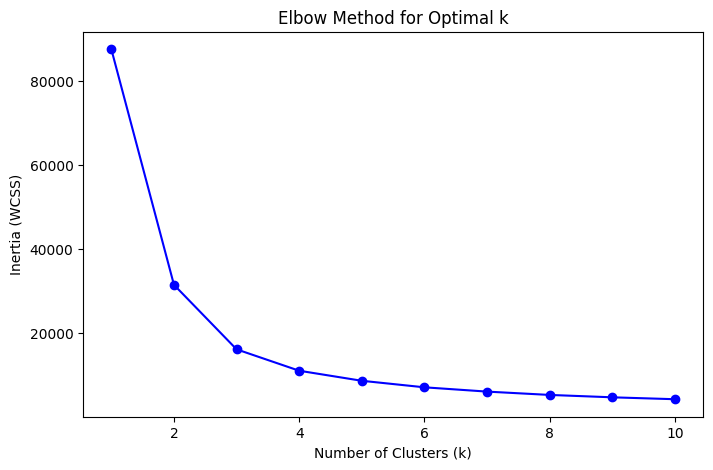

In [ ]:
# Determine the optimal number of clusters using Elbow Method
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

inertia = []  # Stores the Within-Cluster Sum of Squares (WCSS)
K_range = range(1, 11)  # Checking k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)  # Use PCA-transformed data for clustering
    inertia.append(kmeans.inertia_)

# display the result of elbow method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()


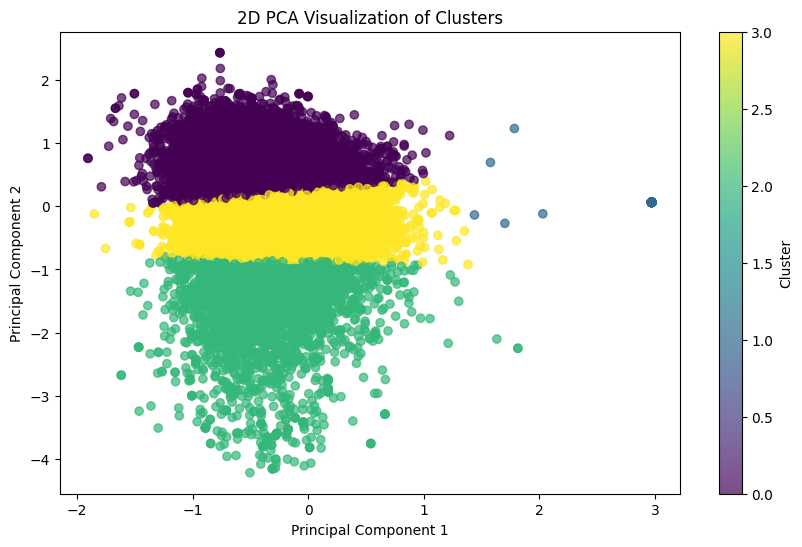

In [ ]:
# Apply K-Means with optimal k (let's assume 4 based on the Elbow Method)

optimal_k = 4

# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_pca)


# Visualizing Clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization of Clusters")
plt.colorbar(scatter, label="Cluster")
plt.show()




## ℹ️ Visualizing Clusters with Word Clouds  (Optional Section)

### Why Use Word Clouds? 🌥️🔠  
After clustering the news articles, it’s helpful to **understand the key themes** in each cluster. A **word cloud** is a simple but effective way to visualize the most common words in each group.  

### How Does It Work? ⚙️  
1️⃣ We **extract the text** from all articles in a cluster.  
2️⃣ We **count word frequencies**, giving more importance to frequently occurring words.  
3️⃣ A **word cloud** is generated, where **larger words** indicate higher frequency in that cluster.  

### What Can We Learn? 🤔  
- Identify **dominant keywords** in each cluster.  
- Get **insights into topic differences** between clusters.  
- Verify if our **K-Means clustering makes sense** based on meaningful word groupings.  

🎯 **Goal:** Use word clouds to quickly interpret the characteristics of each news category! ☁️📰🔍  


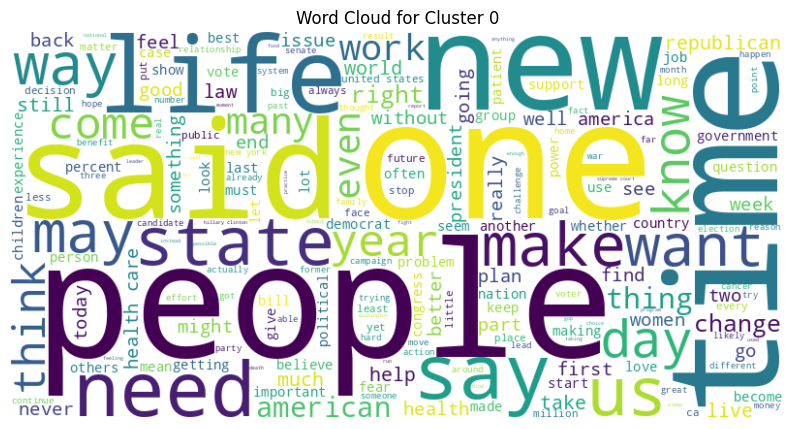

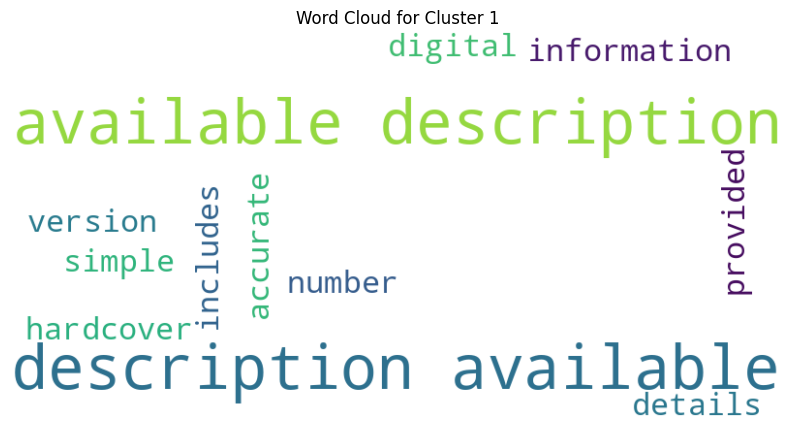

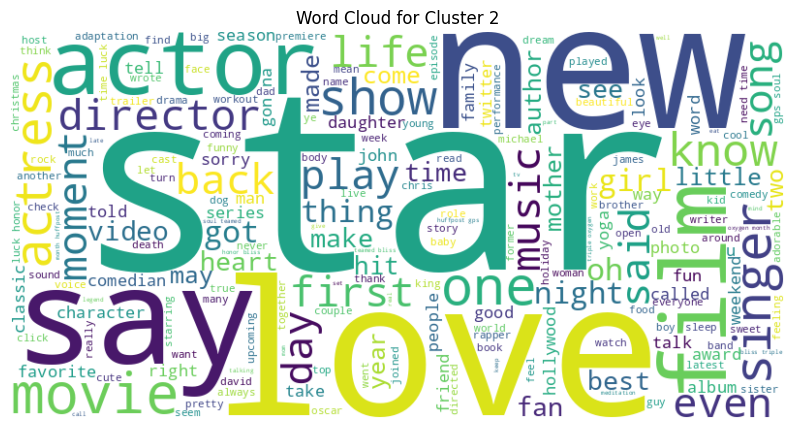

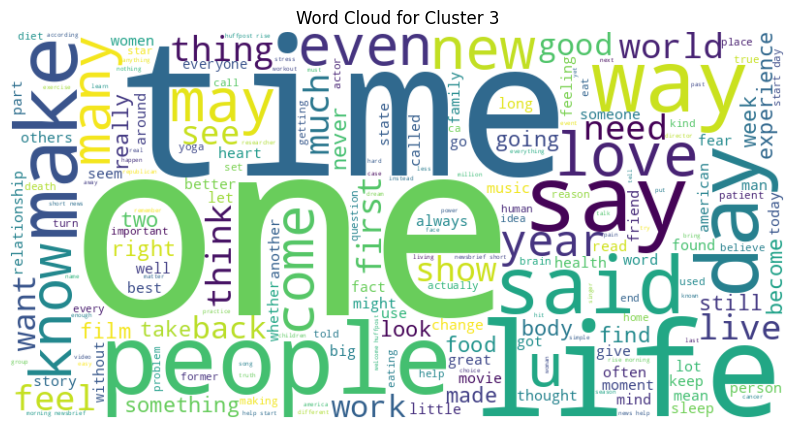

In [ ]:
from wordcloud import WordCloud

for cluster in range(optimal_k):
    # Extract headlines and descriptions belonging to the current cluster
    cluster_descriptions = df[df["cluster"] == cluster]["description"]

    # Combine both headlines and descriptions into a single text
    cluster_text = " ".join(cluster_descriptions)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cluster_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {cluster}")
    plt.show()

# Generate for each cluster


🧐 Critical Thinking & Discussion: Interpreting Our Results 💡📊📰

### 1️⃣ PCA Visualization Analysis
#### 🔍 Question:
Looking at the PCA Projection of News Articles, we see that the data is spread out but still has some overlapping areas.

- What does this distribution tell us about the underlying structure of the articles?
- Do you think reducing dimensionality to 2 components sufficiently preserves the key variations in the dataset? Why or why not?


### 2️⃣ Choosing the Optimal Number of Clusters
#### 📊 Question:
The Elbow Method plot suggests a decreasing trend in distortion as k increases.

- Based on the curve, what would you choose as the optimal k value?
- Why does the distortion decrease as k increases, and why shouldn’t we always choose a very high k?

### 3️⃣ Interpreting Clusters of News Articles
#### 📰 Question:
After applying K-Means clustering, the PCA-reduced plot shows four distinct clusters.

- How well-separated do the clusters appear? Do they seem meaningful?
- What possible themes might each cluster represent in terms of news content? How could we validate our assumptions about these themes?






